# INFO 2950 Project: NBA Player Performance and Salary

## Introduction
#### Background Information
*

#### Research Question(s)
1. What individual performance metrics (points, rebounds, assists, blocks, steals, turnovers) best predict an NBA player's salary?
2. How do NBA player salaries across a team impact team performance and playoff chances?

## Data Description and Cleaning

In order to analyze these research questions, we found two datasets from Kaggle. Our [first dataset](https://www.kaggle.com/datasets/whitefero/nba-player-salary-19902017) includes NBA player salaries from the 1990-1991 season to the 2017-2018 season. Our [second dataset](https://www.kaggle.com/datasets/drgilermo/nba-players-stats?select=Seasons_Stats.csv) includes NBA player performance metrics from the 1950-1951 season to the 2017-2018 season. 

#### Data Collection

(explain what we did to load our dataframe like download, print .head(), etc.)

#### Data Cleaning

(explain what we did when we cleaned our dataframes - SQL filtering, column removal, column renaming, joins, etc.)

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load our datasets/csv files
salaries = pd.read_csv('cleaned_salaries_df.csv')
stats = pd.read_csv('cleaned_stats_df.csv')
df = pd.read_csv('cleaned_df.csv')

print(df)

                 Player  Season Pos Team     G  Salary   PPG  APG  RPG  BPG  \
0         Arron Afflalo  2010.0  SG  DEN  82.0    2.33   8.8  1.7  3.1  0.4   
1     LaMarcus Aldridge  2010.0  PF  POR  78.0   21.46  17.9  2.1  8.0  0.6   
2            Tony Allen  2010.0  SG  BOS  54.0    2.12   6.1  1.3  2.7  0.4   
3         Ryan Anderson  2010.0  PF  ORL  63.0   19.58   7.7  0.6  3.2  0.2   
4       Carmelo Anthony  2010.0  SF  DEN  69.0   26.24  28.2  3.2  6.6  0.4   
...                 ...     ...  ..  ...   ...     ...   ...  ...  ...  ...   
4795     Jamal Crawford  2016.0  SG  LAC  79.0   10.80  14.2  2.3  1.8  0.2   
4796      Zaza Pachulia  2016.0   C  DAL  76.0    4.25   8.6  1.7  9.4  0.3   
4797        Omri Casspi  2017.0  SF  TOT  36.0    1.25   5.2  1.0  3.1  0.1   
4798     Jamal Crawford  2017.0  SG  LAC  82.0   10.80  12.3  2.6  1.6  0.2   
4799      Zaza Pachulia  2017.0   C  GSW  70.0    4.25   6.1  1.9  5.9  0.5   

      SPG  TPG  
0     0.6  0.9  
1     0.9  1.3  


## Pregistration Statements
*

## Data Analysis
(add text details for each step in data analysis)

In [3]:
# Create a train-test split of 70%-30% to ensure our linear regression model generalizes well
train, test = train_test_split(df, test_size = 0.3, random_state = 2950)
print(train.shape)

(3360, 12)


#### Check for multivariable linear regression feasibility 
**Heteroskedasticity:** Before we created a linear regression model, we wanted to test for heteroskedasticity by visually analyzing the relationship between the independent variables (PPG, APG, RPG, BPG, SPG, TPG) and the dependent variable (salary). Therefore, we plotted the independent variables on the x-axis and the dependent variable on the y-axis to run this check. For us to dermine that heteroskedasticity is not a concern, the individual plots should show a random scatter of data points. If the plot is not random, we will need to perform the necessary transformations. 

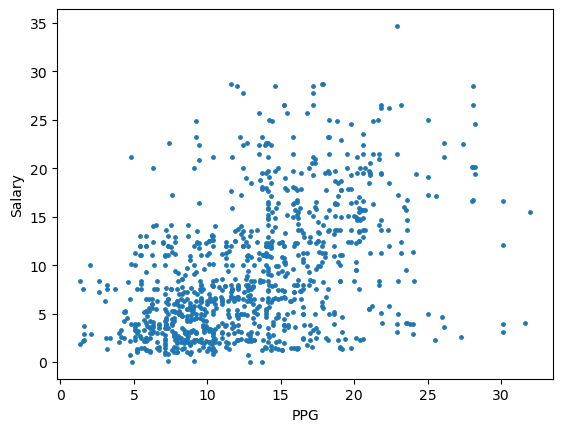

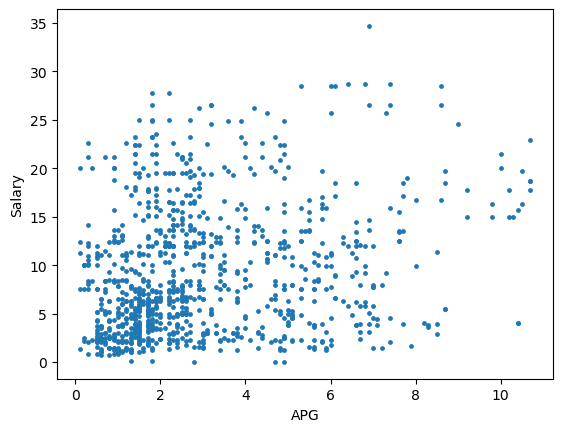

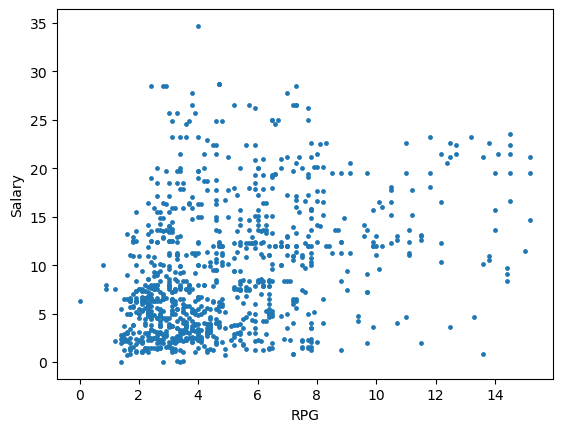

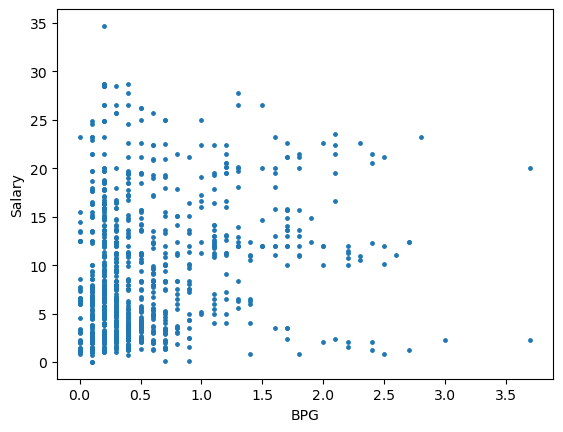

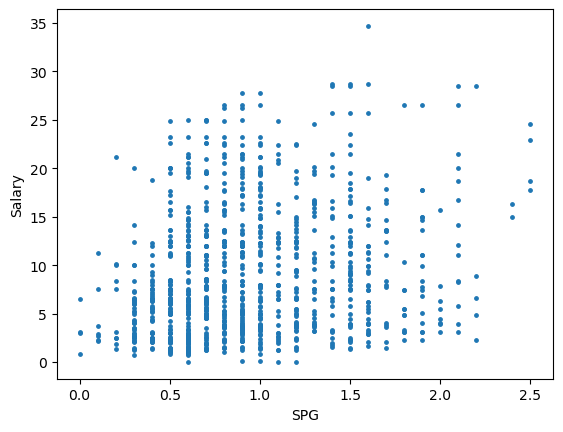

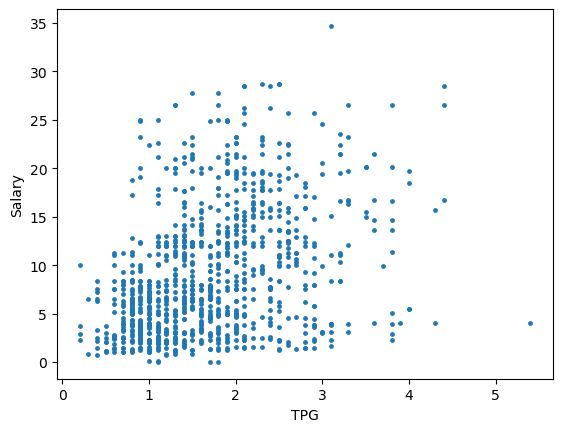

In [19]:
# check feasibility for linear regression by plotting the input and output to check for pre-existing heteroskedasticity
sampled_df = df.sample(n = 1000, random_state = 2950)
categories = ['PPG', 'APG', 'RPG', 'BPG', 'SPG', 'TPG']

for c in df[categories]:
    plt.scatter(x = sampled_df[c], y = sampled_df['Salary'], marker = 'o', s = 6)
    plt.xlabel(c)
    plt.ylabel('Salary')
    plt.show()

**Pre-Model Heteroskedasticity Check Conclusions (Independent vs. Dependent Variables)**

(add more to this section, just brainstorming here so far)

* PPG: heteroskedastic (phase 2 eda shows heteroskedastic)
* APG: random or heteroskedastic?
* RPG: heteroskedastic?
* BPG: pretty random
* SPG: pretty random
* TPG: more heteroskedastic? (same situation as APG)

**Multicollinearity:** 


In [5]:
#code here

**Multicollinearity Check Conclusions**

**Linear Regression Model:** Once we determined that heteroskedasticity and multicollinearity was not a concern, we created a Linear Regression model that was fit on `categories` and salary. We then determined the coefficients for each variable/category as well as the intercept for the model. Larger coefficients mean that the specified statistical category has more influence on a player's salary, while smaller coefficients mean less impact on salary. The intercept specifies the expected/predicted salary when all other variables are zero. 

In [6]:
# Run a linear regression with the input being `categories` and the output being salary
X = df[categories]
y = df['Salary']

model = LinearRegression().fit(X, y)

for category, coef in zip(categories, model.coef_):
    print(f"{category}: {round(coef, 2)}")

print(f"intercept: {round(model.intercept_, 2)}")

PPG: 0.48
APG: 0.75
RPG: 0.61
BPG: 1.29
SPG: -0.58
TPG: -1.39
intercept: -0.16


In [7]:
# use the train set to make predictions based on the categories
train_predictions = model.predict(X)

# use the test set to make predictions based on the categories
test_predictions = model.predict(X)

In [8]:
# check the model's fit and generalizeability (RMSE and MAE)
## RMSE and MAE for training set should be close to the test set and should both be low (?)

0    -3.843534
1     8.077680
2    -1.499177
3    14.842863
4    10.760678
Name: Salary, dtype: float64


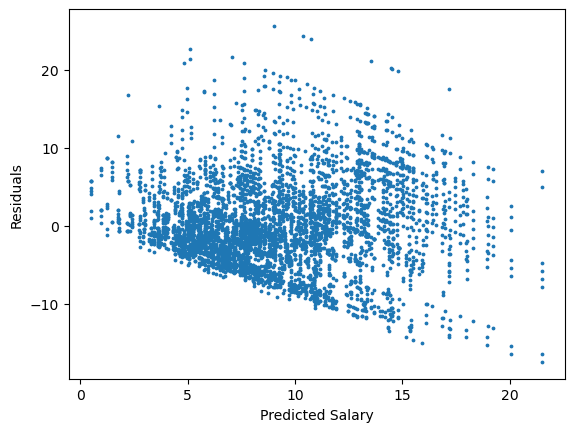

In [9]:
# calculate the residuals between the actual salaries and the salaries that our train set predicts
residuals = df['Salary'] - train_predictions
print(residuals.head())

# plot the residuals and check for heteroskedasticity
plt.scatter(x = train_predictions, y = residuals, marker  = 'o', s = 3)
plt.xlabel('Predicted Salary')
plt.ylabel('Residuals')
plt.show()

**Residual Plot Heteroskedasticity Check**


In [10]:
# run a f-test to analyze the impact of the model on salary

In [11]:
# run a t-test to analyze the impact of individual coefficients on salary 

*overall steps*
- use training set to check that it is feasible to run a multivariable linear regression (heteroskedasticity, multicollinearity) 
- further explanation needed
- use log transforms if needed
- use t-tests and f-tests to analyze the impacts of the individual coefficients and the model as a whole on salary respectively

## Evaluation of Significance

## Conclusions

## Limitations

## Ackowledgements and Bibliography